help manual

https://github.com/ccxt/ccxt/wiki/Manual

## MAIN code

In [1]:
import ccxt
import datetime
import pandas as pd
import pandas_ta as ta
import time 
import json

#visualisation

import matplotlib.pyplot as plt
import seaborn as sns

### PARAMETERS

exchange='bybit'
symbol = 'BTC/USDT'
timeframe = '15m'  # 1 day : 1D timeframe
size=0.0005



# Open the JSON file to read the key and secret


with open('./file.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 5000,
    },
    'apiKey': key_value,
    'secret': secret_value 
})




def fetch_price(symbol):
    price=exchange.fetchOrderBook(symbol)
    return price['bids'][0][0],price['asks'][0][0]

def check_orders(symbol):
    return exchange.fetchOpenOrders(symbol)


def logic_exec(symbol,size,timeframe,price,id):
    # Get the OHLCV (Open, High, Low, Close, Volume) data
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=None, limit=300)

    # creating dataframe of ohlcv
    df=pd.DataFrame(ohlcv)

    ### PSAR
    d=ta.psar(df[2],df[3],df[4],0.06,0.06,0.6)

    

    # taking latest value only
    latest_val=d.iloc[-1]

    ### creating logic


    if latest_val['PSARl_0.06_0.6']>0:
        if id=='':
            price,_=fetch_price(symbol)
            # order = exchange.create_order (symbol, 'market', 'buy', size,price, params={})
            order = exchange.create_order(symbol, 'market', 'buy', size)

            id=order['info']['orderId']
            print('buy')
        print('long execution inlive')
        
            
    elif latest_val['PSARs_0.06_0.6']>0:
        if id!='':
            size=exchange.fetchBalance(params={'type': 'spot',})[f"{symbol.split('/')[0]}"]['free']
            order = exchange.create_order (symbol, 'market', 'sell', size)
            id=''
            print('sell')
        print('short execution inlive')

    plt.figure(figsize=(20,10))
    sns.lineplot(x=df[0],y=df[4],data=df)
    sns.scatterplot(x=df[0],y=d['PSARs_0.06_0.6'],data=df,color='red')
    sns.scatterplot(x=df[0],y=d['PSARl_0.06_0.6'],data=df,color='green')

    plt.savefig(f'./images/plot.png')

    time.sleep(60)



    return logic_exec(symbol,size,timeframe,price,id)


logic_exec(symbol,size,timeframe,fetch_price(symbol)[0],id='1')


# Print the fetched data


C:\Users\PyAlgo\AppData\Local\Temp\ipykernel_14312\1739881877.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


long execution inlive


In [43]:
symbol = 'BNB/USDT'
type = 'limit'
side = 'sell'
amount = 0.01
price =200 
params = {
    'trailingPercent': 1.0, # percentage away from the current market price 1.0 is equal to 1%
    # 'trailingAmount': 100.0, # quote amount away from the current market price
    # 'trailingTriggerPrice': 44500.0, # the price to trigger activating a trailing stop order
    # 'reduceOnly': True, # set to True if you want to close a position, set to False if you want to open a new position
}
order = exchange.create_order (symbol, type, side, amount, price, params)

In [81]:
def fetch_price(symbol):
    price=exchange.fetchOrderBook(symbol)
    return price['bids'][0][0],price['asks'][0][0]
size=exchange.fetchBalance(params={'type': 'spot',})['BNB']['free']
order = exchange.create_order (symbol, 'market', 'sell',size)

## Visualising chart

Text(0, 0.5, 'Price')

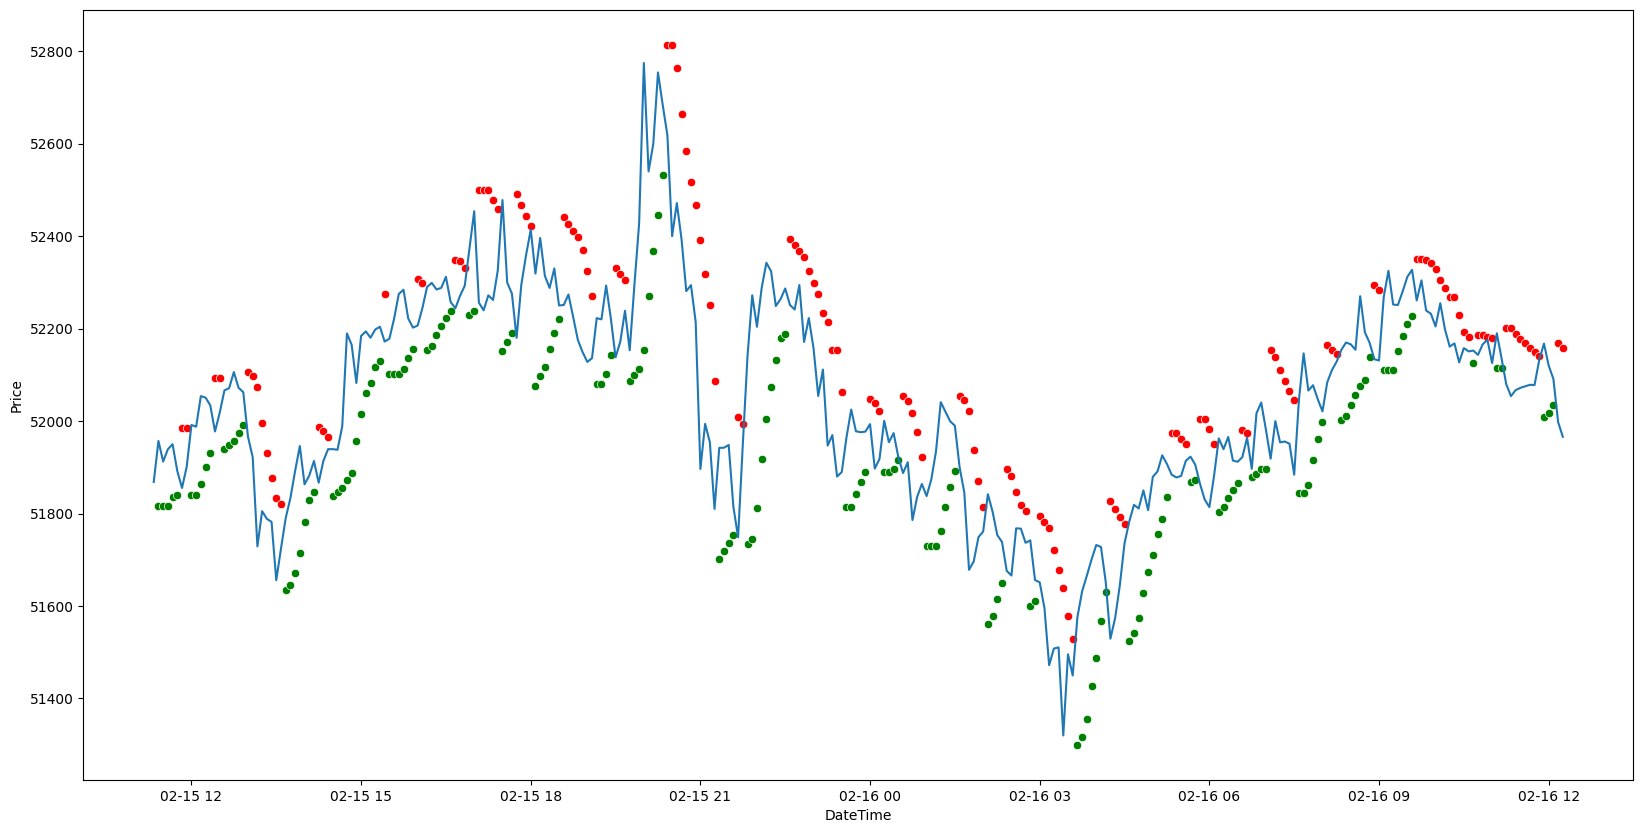

In [172]:
import ccxt
import datetime
import pandas as pd
import pandas_ta as ta
import time 
import json

#visualisation

import matplotlib.pyplot as plt
import seaborn as sns


import json
with open('./file.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]
password=data["password"]
exchange='bybit'
symbol = 'BTC/USDT'
timeframe = '5m'  # 1 day : 1D timeframe
size=0.0005

# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 5000,
    },
    'apiKey': key_value,
    'secret': secret_value 
})

ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=None, limit=300)

# creating dataframe of ohlcv
df=pd.DataFrame(ohlcv)
df.rename(columns={0:'time',1:'Open',2:'High',3:'Low',4:'Close',5:'Volume'},inplace=True)


### PSAR
d=ta.psar(df['High'],df['Low'],df['Close'],0.06,0.06,0.6)
# Assuming df is your pandas DataFrame and 'time' is the column containing the Unix timestamps in milliseconds
df['time'] = df['time'].apply(lambda x: datetime.datetime.fromtimestamp(x / 1e3))



# taking latest value only
latest_val=d.iloc[-1]

plt.figure(figsize=(20,10))
sns.lineplot(x=df['time'],y=df['Close'],data=df)
sns.scatterplot(x=df['time'],y=d['PSARs_0.06_0.6'],data=df,color='red')
sns.scatterplot(x=df['time'],y=d['PSARl_0.06_0.6'],data=df,color='green')
plt.xlabel('DateTime')
plt.ylabel('Price')



## Testground

In [ ]:
import ccxt
import datetime
import pandas as pd
import pandas_ta as ta
import time 
import json

#visualisation

import matplotlib.pyplot as plt
import seaborn as sns

### PARAMETERS

exchange='bybit'
symbol = 'BTC/USDT'
timeframe = '15m'  # 1 day : 1D timeframe
size=0.0005



# Open the JSON file to read the key and secret


with open('./file.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 5000,
    },
    'apiKey': key_value,
    'secret': secret_value 
})




def fetch_price(symbol):
    price=exchange.fetchOrderBook(symbol)
    return price['bids'][0][0],price['asks'][0][0]

def check_orders(symbol):
    return exchange.fetchOpenOrders(symbol)


def logic_exec(symbol,size,timeframe,price,id):
    # Get the OHLCV (Open, High, Low, Close, Volume) data
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=None, limit=300)

    # creating dataframe of ohlcv
    df=pd.DataFrame(ohlcv)

    ### PSAR
    d=ta.psar(df[2],df[3],df[4],0.06,0.06,0.6)

    

    # taking latest value only
    latest_val=d.iloc[-1]

    ### creating logic


    if latest_val['PSARl_0.06_0.6']>0:
        if id=='':
            price,_=fetch_price(symbol)
            # order = exchange.create_order (symbol, 'market', 'buy', size,price, params={})
            order = exchange.create_order (symbol, 'market', 'buy', size)

            id=order['info']['orderId']
            print('buy')
        print('long execution inlive')
        
            
    elif latest_val['PSARs_0.06_0.6']>0:
        if id!='':
            size=exchange.fetchBalance(params={'type': 'spot',})[f"{symbol.split('/')[0]}"]['free']
            order = exchange.create_order (symbol, 'market', 'sell', size)
            id=''
            print('sell')
        print('short execution inlive')

    plt.figure(figsize=(20,10))
    sns.lineplot(x=df[0],y=df[4],data=df)
    sns.scatterplot(x=df[0],y=d['PSARs_0.06_0.6'],data=df,color='red')
    sns.scatterplot(x=df[0],y=d['PSARl_0.06_0.6'],data=df,color='green')

    plt.savefig(f'./images/plot.png')

    time.sleep(60)


    
    return logic_exec(symbol,size,timeframe,price,id)


logic_exec(symbol,size,timeframe,fetch_price(symbol)[0],id='1')


# Print the fetched data


## Backtesting

In [129]:
import pandas as pd
import datetime
import ccxt
import datetime
import pandas as pd
import pandas_ta as ta
import time 
import json
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

### PARAMETERS

exchange='bybit'
symbol = 'BTC/USDT'
timeframe = '5m'  # 1 day : 1D timeframe
size=0.0005
limit=5000



# Open the JSON file to read the key and secret


with open('./file.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 5000,
    },
    'apiKey': key_value,
    'secret': secret_value 
})

ohlcv = exchange.fetch_ohlcv(symbol, timeframe, limit=limit,)

    # creating dataframe of ohlcv
df=pd.DataFrame(ohlcv)
df.rename(columns={0:'time',1:'Open',2:'High',3:'Low',4:'Close',5:'Volume'},inplace=True)


### PSAR
d=ta.psar(df['High'],df['Low'],df['Close'],0.06,0.06,0.6)
# Assuming df is your pandas DataFrame and 'time' is the column containing the Unix timestamps in milliseconds
df['time'] = df['time'].apply(lambda x: datetime.datetime.fromtimestamp(x / 1e3))
df=pd.concat([df,d],axis=1)
# Initialize a list to store the buy status
bought_status = [False]
price1 = [0]

# Calculate the gain based on the conditions
def calculate_gain(row):
    if not bought_status[0] and row['PSARl_0.06_0.6'] > 1:
        # Buy at price1
        price1[0] = row['Open']  # Assuming 'open' represents the opening price
        bought_status[0] = True
    if bought_status[0] and row['PSARs_0.06_0.6'] > 1:
        # Exit at price2
        price2 = row['Close']  # Assuming 'close' represents the closing price
        gain = (price2 - price1[0]) / price1[0]
        bought_status[0] = False
        return gain  # Return the log of the gain  # Calculate the gain in log value
    return 0  # Return 0 if the conditions are not met

# Apply the calculate_gain function to each row and create a new column 'gain_log'
df['gain'] = df.apply(calculate_gain, axis=1)
df['log_gain'] = np.log(1 + df['gain'])
net_gain = df['log_gain'].sum()
print(f'{net_gain*100}% for duration of {df["time"].iloc[0]} - {df["time"].iloc[-1]}')

13.67360019239086% for duration of 2024-02-13 00:10:00 - 2024-02-16 11:25:00


#### final backtesting with all tf 

In [188]:
import pandas as pd
import datetime
import ccxt
from datetime import datetime, timezone, timedelta

import pandas as pd
import pandas_ta as ta
import time 
import json
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

### PARAMETERS


def backtesting(from_time,symbol:str='BTC/USDT',timeframe:str='15m'):

    exchange='bybit'




    # Open the JSON file to read the key and secret


    with open('./file.json') as f:
        data = json.load(f)

    # Access the values from the loaded JSON data
    key_value = data["key"]
    secret_value = data["secret"]


    # Initialize the exchange
    exchange = eval(f'ccxt.{exchange}')({
        'enableRateLimit': True, 
        'options': {
            'adjustForTimeDifference': True,
            'recvWindow': 500000,
        },
        'apiKey': key_value,
        'secret': secret_value 
    })
    date_string=from_time
    date_object = datetime.strptime(date_string, '%Y-%m-%d')

# Set the timezone to UTC 0.0
    date_object_utc = date_object.replace(tzinfo=timezone.utc)

    # Convert to a numerical representation (timestamp)
    timestamp = date_object_utc.timestamp()
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe,limit=1000)


    # ohlcv = exchange.fetch_ohlcv(symbol, timeframe, params={'start': int(timestamp)})

        # creating dataframe of ohlcv
    df=pd.DataFrame(ohlcv)
    df.rename(columns={0:'time',1:'Open',2:'High',3:'Low',4:'Close',5:'Volume'},inplace=True)


    ### PSAR
    d=ta.psar(df['High'],df['Low'],df['Close'],0.06,0.06,0.6)
    # Assuming df is your pandas DataFrame and 'time' is the column containing the Unix timestamps in milliseconds
    df['time'] = df['time'].apply(lambda x: datetime.fromtimestamp(x / 1e3))
    df=pd.concat([df,d],axis=1)
    # Initialize a list to store the buy status
    bought_status = [False]
    price1 = [0]

    # Calculate the gain based on the conditions
    def calculate_gain(row):
        if not bought_status[0] and row['PSARl_0.06_0.6'] > 1:
            # Buy at price1
            price1[0] = row['Open']  # Assuming 'open' represents the opening price
            bought_status[0] = True
        if bought_status[0] and row['PSARs_0.06_0.6'] > 1:
            # Exit at price2
            price2 = row['Close']  # Assuming 'close' represents the closing price
            gain = (price2 - price1[0]) / price1[0]
            bought_status[0] = False
            return gain  # Return the log of the gain  # Calculate the gain in log value
        return 0  # Return 0 if the conditions are not met

    # Apply the calculate_gain function to each row and create a new column 'gain_log'
    df['gain'] = df.apply(calculate_gain, axis=1)
    df['log_gain'] = np.log(1 + df['gain'])
    net_gain = df['log_gain'].sum()
    s=f'{net_gain*100}% for duration of {df["time"].iloc[0]} - {df["time"].iloc[-1]}'
    return s

############################## backtesting ###################

symbol='ETH/USDT'
timeframe=['1m','5m','15m','30m','1h','2h']
final_result=[]
date='2024-02-11'
for i in timeframe:
    final_result.append(backtesting(symbol=symbol,timeframe=i,from_time=date)+f'timeframe {i}')




final_result

['6.525489043786703% for duration of 2024-02-15 19:48:00 - 2024-02-16 12:27:00timeframe 1m',
 '12.987148567481091% for duration of 2024-02-13 01:10:00 - 2024-02-16 12:25:00timeframe 5m',
 '24.784578483379885% for duration of 2024-02-06 02:30:00 - 2024-02-16 12:15:00timeframe 15m',
 '32.143770746425595% for duration of 2024-01-26 16:30:00 - 2024-02-16 12:00:00timeframe 30m',
 '42.79936475762168% for duration of 2024-01-05 20:30:00 - 2024-02-16 11:30:00timeframe 1h',
 '72.73969540571404% for duration of 2023-11-25 05:30:00 - 2024-02-16 11:30:00timeframe 2h']

#### conversion of datetime into int format

In [144]:
from datetime import datetime, timezone, timedelta

date_string = '2023-12-02'

# Convert the string to a datetime object
date_object = datetime.strptime(date_string, '%Y-%m-%d')

# Set the timezone to UTC 0.0
date_object_utc = date_object.replace(tzinfo=timezone.utc)

# Convert to a numerical representation (timestamp)
timestamp = date_object_utc.timestamp()

print("Numerical representation:", timestamp)


Numerical representation: 1701475200.0


In [ ]:
# -*- coding: utf-8 -*-

import asyncio
import os
from random import randint
import sys
from pprint import pprint

root = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))
sys.path.append(root + '/python')

import ccxt.async_support as ccxt  # noqa: E402


print('CCXT Version:', ccxt.__version__)

exchange = ccxt.bybit({
    'apiKey': 'YOUR_API_KEY',
    'secret': 'YOUR_SECRET_KEY',
})


# Example 1: Spot : fetch balance, create order, cancel it and check canceled orders
async def example_1():
    exchange.options['defaultType'] = 'spot'; # very important set spot as default type
    markets = await exchange.load_markets(True)

    # fetch spot balance
    balance = await exchange.fetch_balance()
    print(balance)

    # create limit order
    symbol = 'LTC/USDT'
    type = 'limit'
    side = 'buy'
    amount = 0.1
    price = 50
    create_order = await exchange.create_order(symbol, type, side, amount, price)
    print('Create order id:', create_order['id'])

    # cancel created order
    canceled_order = await exchange.cancel_order(create_order['id'], symbol)
    print(canceled_order)

    # Check canceled orders (bybit does not have a single endpoint to check orders
    # we have to choose whether to check open or closed orders and call fetch_open_orders
    # or fetch_closed_orders respectively
    orders = await exchange.fetch_closed_orders(symbol)
    print(orders)
    await exchange.close()

# -------------------------------------------------------------------------------------------

# Example 2 :: Swap : fetch balance, open a position and close it
async def example_2():
    exchange.options['defaultType'] = 'swap'; # very important set swap as default type
    markets = await exchange.load_markets(True)

    # fetch swap balance
    balance = await exchange.fetch_balance()
    print(balance)

    # create market order and open position
    symbol = 'LTC/USDT:USDT'
    type = 'market'
    side = 'buy'
    amount = 0.1
    price = None
    create_order = await exchange.create_order(symbol, type, side, amount, price)
    print('Create order id:', create_order['id'])

    # check opened position
    symbols = [ symbol ]
    positions = await exchange.fetch_positions(symbols)
    print(positions)

    # Close position by issuing a order in the opposite direction
    side = 'sell'
    params = {
        'reduce_only': True
    }
    close_position_order = await exchange.createOrder(symbol, type, side, amount, price, params)
    print(close_position_order)

# -------------------------------------------------------------------------------------------

# Example 3 :: USDC Swap : fetch balance, open a position and close it
async def example_3():
    exchange.options['defaultType'] = 'swap'; # very important set swap as default type
    markets = await exchange.load_markets(True)

    # fetch USDC swap balance
    # when no symbol is available we can show our intent
    # of using USDC endpoints by either using defaultSettle in options or
    # settle in params
    # Using Options: exchange.options['defaultSettle'] = 'USDC';
    # Using params:
    balanceParams = {
        'settle': 'USDC'
    }
    balance = await exchange.fetch_balance(balanceParams)
    print(balance)

    # create order and open position
    # taking into consideration that USDC markets do not support
    # market orders
    symbol = 'BTC/USD:USDC'
    type = 'limit'
    side = 'buy'
    amount = 0.1
    price = 15000 # adjust this accordingly
    create_order = await exchange.create_order(symbol, type, side, amount, price)
    print('Create order id:', create_order['id'])

    # check if the order was filled and the position opened
    symbols = [ symbol ]
    positions = await exchange.fetch_positions(symbols)
    print(positions)

    # Close position (assuming it was already opened) by issuing an order in the opposite direction
    side = 'sell'
    params = {
        'reduce_only': True
    }
    close_position_order = await exchange.createOrder(symbol, type, side, amount, price, params)
    print(close_position_order)

# -------------------------------------------------------------------------------------------

# Example 4 :: Future : fetch balance, create stop-order and check open stop-orders
async def example_4():
    exchange.options['defaultType'] = 'future'; # very important set future as default type
    markets = await exchange.load_markets(True)

    # fetch future balance
    balance = await exchange.fetch_balance()
    print(balance)

    # create stop-order
    symbol = 'ETH/USD:ETH-220930'
    amount = 10  # in USD for inverse futures
    price = 1200
    side = 'buy'
    type = 'limit'
    stop_order_params = {
        'position_idx': 0, # 0 One-Way Mode, 1 Buy-side, 2 Sell-side, default = 0
        'stopPrice': 1000, # mandatory for stop orders
        'basePrice': 1100  # mandatory for stop orders
    }
    stop_order = await exchange.create_order(symbol, type, side, amount, price, stop_order_params)
    print('Create order id:', stop_order['id'])

    # check opened stop-order
    open_order_params = {
        'stop': True
    }
    openOrders = await exchange.fetch_open_orders(symbol, None, None, open_order_params)
    print(openOrders)

    # cancell all open stop-orders
    cancelOrder = await exchange.cancel_all_orders(symbol, open_order_params)
    print(cancelOrder)

# -------------------------------------------------------------------------------------------

async def main():
    try:
        await example_1()
        await example_2()
        await example_3()
        await example_4()
    except Exception as e:
        print(e)
    await exchange.close()
    
    


asyncio.run(main())



### future trading code


In [ ]:

import pandas as pd
import datetime
import ccxt
from datetime import datetime, timezone, timedelta

import pandas as pd
import pandas_ta as ta
import time 
import json
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns


exchange='bybit'
symbol = 'BTC/USDT:USDT'
timeframe = '5m'  # 1 day : 1D timeframe
size=0.001
limit=5000
stoploss=60
deviation=1
unrealisedPnl=0.001

with open('./file.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 5000,
        'defaultType': 'swap',    
    },
    'apiKey': key_value,
    'secret': secret_value 
})



def fetch_price(symbol):
    price=exchange.fetchTicker(symbol.split(':')[0])['last']
    return price
    

def check_open_orders(symbol):
    return exchange.fetchOpenOrders(symbol)


def get_latest_position(symbol):
    positions = exchange.fetch_positions(symbol)
    contracts = positions[0]['contracts']
    pnl=positions[0]['info']['unrealisedPnl']
    return contracts,pnl


def open_long(symbol,amount):
    side='buy'
    type='limit'
    amount=size
    price=fetch_price(symbol)
    params={
        'stopLoss': {
            'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
            'price': price-stoploss,  # limit price for a limit stop loss order
            'triggerPrice': price-stoploss+deviation,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    return order


def open_short(symbol,amount):
    side='sell'
    type='limit'
    amount=size
    price=fetch_price(symbol)
    params={
        'stopLoss': {
            'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
            'price': price+stoploss,  # limit price for a limit stop loss order
            'triggerPrice': price+stoploss-deviation,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    return order




def logic_exec(symbol,size,timeframe,price,id,isLong,isShort):
    # Get the OHLCV (Open, High, Low, Close, Volume) data
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=None, limit=300)

    # creating dataframe of ohlcv
    df=pd.DataFrame(ohlcv)

    ### PSAR
    d=ta.psar(df[2],df[3],df[4],0.06,0.06,0.6)

    

    # taking latest value only
    latest_val=d.iloc[-1]

    ### creating logic
    _,latest_position_detail=get_latest_position(symbol)

    
    if latest_val['PSARl_0.06_0.6']>0:
        if id==None :
            order=open_long(symbol,size)
            id=order['id']
            isLong=True
            print('buy')

        elif id!=None and isShort:
            side = 'sell'
            type='limit'
            price=fetch_price(symbol)
            params = {
                'reduce_only': True
            }
            amount=size
            close_position_order = exchange.createOrder(symbol, type, side, amount, price, params)
            isLong=False
            id=None
            print('Long position close has been placed')

        



            #####  if condition for stop loss triggers 

            
    elif latest_val['PSARs_0.06_0.6']>0:
        if id==None:
            order=open_short(symbol,size)
            id=order['id']
            isShort=True
            print('sell')

        elif id!=None and isLong:
            side = 'buy'
            type='limit'
            amount=size
            price=fetch_price(symbol)
            params = {
                'reduce_only': True
            }
            close_position_order = exchange.createOrder(symbol, type, side, amount, price, params)
            isShort=False
            id=None
            print('Short position close has been placed')
        

    elif float(latest_position_detail)>=unrealisedPnl:
        exchange.cancel_all_orders(symbol)
        price=fetch_price(symbol)
        if isLong:
            exchange.createStopLossOrder(symbol, type='limit', side='sell', amount=size, price=price, stopLossPrice=price-stoploss+deviation)
            print('stop loss updated for long')
        elif isShort:
            exchange.createStopLossOrder(symbol, type='limit', side='buy', amount=size, price=price, stopLossPrice=price+stoploss-deviation)
            print('stop loss updated for short')




    time.sleep(3)


    
    return logic_exec(symbol,size,timeframe,price,id,isLong,isShort)


logic_exec(symbol,size,timeframe,fetch_price(symbol),id=None,isLong=False,isShort=False)


In [30]:
exchange.fetch_position(symbol)['info']['unrealisedPnl']

'0.12313'

In [ ]:
     """
        create a trade order
        :see: https://bybit-exchange.github.io/docs/v5/order/create-order
        :see: https://bybit-exchange.github.io/docs/v5/position/trading-stop
        :param str symbol: unified symbol of the market to create an order in
        :param str type: 'market' or 'limit'
        :param str side: 'buy' or 'sell'
        :param float amount: how much of currency you want to trade in units of base currency
        :param float [price]: the price at which the order is to be fullfilled, in units of the quote currency, ignored in market orders
        :param dict [params]: extra parameters specific to the exchange API endpoint
        :param str [params.timeInForce]: "GTC", "IOC", "FOK"
        :param bool [params.postOnly]: True or False whether the order is post-only
        :param bool [params.reduceOnly]: True or False whether the order is reduce-only
        :param str [params.positionIdx]: *contracts only*  0 for one-way mode, 1 buy side  of hedged mode, 2 sell side of hedged mode
        :param boolean [params.isLeverage]: *unified spot only* False then spot trading True then margin trading
        :param str [params.tpslMode]: *contract only* 'full' or 'partial'
        :param str [params.mmp]: *option only* market maker protection
        :param str [params.triggerDirection]: *contract only* the direction for trigger orders, 'above' or 'below'
        :param float [params.triggerPrice]: The price at which a trigger order is triggered at
        :param float [params.stopLossPrice]: The price at which a stop loss order is triggered at
        :param float [params.takeProfitPrice]: The price at which a take profit order is triggered at
        :param dict [params.takeProfit]: *takeProfit object in params* containing the triggerPrice at which the attached take profit order will be triggered
        :param float [params.takeProfit.triggerPrice]: take profit trigger price
        :param dict [params.stopLoss]: *stopLoss object in params* containing the triggerPrice at which the attached stop loss order will be triggered
        :param float [params.stopLoss.triggerPrice]: stop loss trigger price
        :param str [params.trailingAmount]: the quote amount to trail away from the current market price
        :param str [params.trailingTriggerPrice]: the price to trigger a trailing order, default uses the price argument
        :returns dict: an `order structure <https://docs.ccxt.com/#/?id=order-structure>`
        """

### final future trading code

In [ ]:

import pandas as pd
import datetime
import ccxt
from datetime import datetime, timezone, timedelta

import pandas as pd
import pandas_ta as ta
import time 
import json
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns


exchange='bybit'
symbol = 'BTC/USDT:USDT'
timeframe = '5m'  # 1 day : 1D timeframe
size=0.001
limit=5000
stoploss=50
deviation=1
unrealisedPnl=0.001

with open('./file.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 5000,
        'defaultType': 'swap',    
    },
    'apiKey': key_value,
    'secret': secret_value 
})



def fetch_price(symbol):
    # price=exchange.fetchTicker(symbol.split(':')[0])['last']
    price=exchange.fetchOrderBook(symbol)['bids'][0][0]
    return price
    

def check_open_orders(symbol):
    return exchange.fetchOpenOrders(symbol)


def get_latest_position(symbol):
    positions = exchange.fetch_positions(symbol)
    contracts = positions[0]['contracts']
    pnl=positions[0]['info']['unrealisedPnl']
    id=positions[0]['id']
    return id,contracts,pnl


def open_long(symbol,amount):
    side='buy'
    type='limit'
    amount=size
    price=fetch_price(symbol)
    params={
        'stopLoss': {
            'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
            'price': price-stoploss,  # limit price for a limit stop loss order
            'triggerPrice': price-stoploss+deviation,
        },
        'takeProfit': {
            'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
            'price': price+stoploss,  # limit price for a limit take profit order
            'triggerPrice': price+stoploss-deviation,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    take_profit=price+stoploss
    return order,take_profit


def open_short(symbol,amount):
    side='sell'
    type='limit'
    amount=size
    price=fetch_price(symbol)
    params={
        'stopLoss': {
            'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
            'price': price+stoploss,  # limit price for a limit stop loss order
            'triggerPrice': price+stoploss-deviation,
        },
        'takeProfit': {
            'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
            'price': price-stoploss,  # limit price for a limit take profit order
            'triggerPrice': price-stoploss+deviation,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    take_profit=price-stoploss
    return order,take_profit




def logic_exec(symbol,size,timeframe,price,id,isLong,isShort,trail_price,takeprofit_price):
    # Get the OHLCV (Open, High, Low, Close, Volume) data
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=None, limit=300)

    # creating dataframe of ohlcv
    df=pd.DataFrame(ohlcv)

    ### PSAR
    d=ta.psar(df[2],df[3],df[4],0.06,0.06,0.6)

    

    # taking latest value only
    latest_val=d.iloc[-1]

    ### creating logic
    position,_,latest_position_detail=get_latest_position(symbol)


    try:
        if latest_val['PSARl_0.06_0.6']>0:
            if id==None :
                order,takeprofit_price=open_long(symbol,size)
                id=order['id']
                isLong=True
                print('buy')

            

            elif id!=None and isShort:
                side = 'sell'
                type='market'
                price=fetch_price(symbol)
                params = {
                    'reduce_only': True
                }
                amount=size
                close_position_order = exchange.createOrder(symbol, type, side, amount, price, params)
                isLong=False
                id=None
                print('Long position close has been placed')

                #####  if condition for stop loss triggers 

                
        elif latest_val['PSARs_0.06_0.6']>0:
            if id==None:
                order,takeprofit_price=open_short(symbol,size)
                id=order['id']
                isShort=True
                print('sell')

        

            elif id!=None and isLong:
                side = 'buy'
                type='market'
                amount=size
                price=fetch_price(symbol)
                params = {
                    'reduce_only': True
                }
                close_position_order = exchange.createOrder(symbol, type, side, amount, price, params)
                isShort=False
                id=None
                print('Short position close has been placed')
    except:
        pass



    try:
        if float(latest_position_detail)>=unrealisedPnl:
            price=fetch_price(symbol)
            
            if isLong and trail_price<price:
                exchange.cancel_all_orders(symbol)
                exchange.createStopLossOrder(symbol, type='market', side='sell', amount=size, price=price, stopLossPrice=price-stoploss+deviation)
                exchange.createTakeProfitOrder(symbol, type='limit', side='sell', amount=size, price=takeprofit_price, takeProfitPrice=takeprofit_price-deviation)
                trail_price=price
                print('stop loss updated for long')
                
            elif isShort and trail_price>price:
                exchange.cancel_all_orders(symbol)
                exchange.createStopLossOrder(symbol, type='market', side='buy', amount=size, price=price, stopLossPrice=price+stoploss-deviation)
                exchange.createTakeProfitOrder(symbol, type='limit', side='buy', amount=size, price=takeprofit_price, takeProfitPrice=takeprofit_price+deviation)

                trail_price=price
                print('stop loss updated for short')
        
    except:
        pass
    
    time.sleep(4)


    try:
        x=exchange.fetch_positions(symbol)[0]['side']
        if x==None:
            exchange.cancel_all_orders(symbol)
            print('no position')
            id=None
            isLong=False
            isShort=False

    except:
        pass



    
    return logic_exec(symbol,size,timeframe,price,id,isLong,isShort,trail_price,takeprofit_price)


logic_exec(symbol,size,timeframe,fetch_price(symbol),id=None,isLong=False,isShort=False,trail_price=0,takeprofit_price=0)


In [2]:

import pandas as pd
import datetime
import ccxt
from datetime import datetime, timezone, timedelta

import pandas as pd
import pandas_ta as ta
import time 
import json
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns


exchange='bybit'
symbol = 'BTC/USDT:USDT'
timeframe = '1m'  # 1 day : 1D timeframe
size=0.001
limit=5000
stoploss=30
deviation=1
unrealisedPnl=0.001

with open('./file.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 5000,
        'defaultType': 'swap',    
    },
    'apiKey': key_value,
    'secret': secret_value 
})



def fetch_price(symbol):
    # price=exchange.fetchTicker(symbol.split(':')[0])['last']
    price=exchange.fetchOrderBook(symbol)['bids'][0][0]
    return price
    

def check_open_orders(symbol):
    return exchange.fetchOpenOrders(symbol)


def get_latest_position(symbol):
    positions = exchange.fetch_positions(symbol)
    contracts = positions[0]['contracts']
    pnl=positions[0]['info']['unrealisedPnl']
    id=positions[0]['id']
    return id,contracts,pnl


def open_long(symbol,amount):
    side='buy'
    type='limit'
    amount=size
    price=fetch_price(symbol)
    params={
        'stopLoss': {
            'type': 'market',  # or 'market', this field is not necessary if limit price is specified
            #'price': price-stoploss,  # limit price for a limit stop loss order
            'triggerPrice': price-stoploss,
        },
        'takeProfit': {
            'type': 'market',  # or 'market', this field is not necessary if limit price is specified
            #'price': price+stoploss-10,  # limit price for a limit take profit order
            'triggerPrice': price+stoploss-10,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    take_profit=price+stoploss
    return order,take_profit


def open_short(symbol,amount):
    side='sell'
    type='limit'
    amount=size
    price=fetch_price(symbol)
    params={
        'stopLoss': {
            'type': 'market',  # or 'market', this field is not necessary if limit price is specified
            #'price': price+stoploss,  # limit price for a limit stop loss order
            'triggerPrice': price+stoploss,
        },
        'takeProfit': {
            'type': 'market',  # or 'market', this field is not necessary if limit price is specified
            #'price': price-stoploss+10,  # limit price for a limit take profit order
            'triggerPrice': price-stoploss+10,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    take_profit=price-stoploss
    return order,take_profit




def logic_exec(symbol,size,timeframe,price,id,isLong,isShort,trail_price,takeprofit_price):
    # Get the OHLCV (Open, High, Low, Close, Volume) data
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=None, limit=300)

    # creating dataframe of ohlcv
    df=pd.DataFrame(ohlcv)

    ### PSAR
    d=ta.psar(df[2],df[3],df[4],0.06,0.06,0.6)

    

    # taking latest value only
    latest_val=d.iloc[-1]

    ### creating logic
    position,_,latest_position_detail=get_latest_position(symbol)


    try:
        if latest_val['PSARl_0.06_0.6']>0:
            if id==None :
                order,takeprofit_price=open_long(symbol,size)
                id=order['id']
                isLong=True
                print('buy')

            

            elif id!=None and isShort:
                side = 'sell'
                type='market'
                price=fetch_price(symbol)
                params = {
                    'reduce_only': True
                }
                amount=size
                close_position_order = exchange.createOrder(symbol, type, side, amount, price, params)
                isLong=False
                id=None
                print('Long position close has been placed')

                #####  if condition for stop loss triggers 

                
        elif latest_val['PSARs_0.06_0.6']>0:
            if id==None:
                order,takeprofit_price=open_short(symbol,size)
                id=order['id']
                isShort=True
                print('sell')

        

            elif id!=None and isLong:
                side = 'buy'
                type='market'
                amount=size
                price=fetch_price(symbol)
                params = {
                    'reduce_only': True
                }
                close_position_order = exchange.createOrder(symbol, type, side, amount, price, params)
                isShort=False
                id=None
                print('Short position close has been placed')
    except:
        id=None
        isLong=False
        isShort=False
        pass



    # try:
    #     if float(latest_position_detail)>=unrealisedPnl:
    #         price=fetch_price(symbol)
            
    #         if isLong and trail_price<price:
    #             exchange.cancel_all_orders(symbol)
    #             exchange.createStopLossOrder(symbol, type='market', side='sell', amount=size, price=price, stopLossPrice=price-stoploss+deviation)
    #             exchange.createTakeProfitOrder(symbol, type='limit', side='sell', amount=size, price=takeprofit_price, takeProfitPrice=takeprofit_price-deviation)
    #             trail_price=price
    #             print('stop loss updated for long')
                
    #         elif isShort and trail_price>price:
    #             exchange.cancel_all_orders(symbol)
    #             exchange.createStopLossOrder(symbol, type='market', side='buy', amount=size, price=price, stopLossPrice=price+stoploss-deviation)
    #             exchange.createTakeProfitOrder(symbol, type='limit', side='buy', amount=size, price=takeprofit_price, takeProfitPrice=takeprofit_price+deviation)

    #             trail_price=price
    #             print('stop loss updated for short')
        
    # except:
    #     pass
    
    time.sleep(4)


    # try:
    #     x=exchange.fetch_positions(symbol)[0]['side']
    #     if x==None:
    #         exchange.cancel_all_orders(symbol)
    #         print('no position')
    #         id=None
    #         isLong=False
    #         isShort=False

    # except:
    #     pass



    
    return logic_exec(symbol,size,timeframe,price,id,isLong,isShort,trail_price,takeprofit_price)


logic_exec(symbol,size,timeframe,fetch_price(symbol),id=None,isLong=False,isShort=False,trail_price=0,takeprofit_price=0)


sell
buy


KeyboardInterrupt: 

In [4]:

import pandas as pd
import datetime
import ccxt
from datetime import datetime, timezone, timedelta

import pandas as pd
import pandas_ta as ta
import time 
import json
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns


exchange='bybit'
symbol = 'BTC/USDT:USDT'
timeframe = '1m'  # 1 day : 1D timeframe
size=0.001
limit=5000
stoploss=50
deviation=1
unrealisedPnl=0.001

with open('./file.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 5000,
        'defaultType': 'swap',    
    },
    'apiKey': key_value,
    'secret': secret_value 
})



def fetch_price(symbol):
    # price=exchange.fetchTicker(symbol.split(':')[0])['last']
    price=exchange.fetchOrderBook(symbol)['bids'][0][0]
    return price
    

def check_open_orders(symbol):
    return exchange.fetchOpenOrders(symbol)


def get_latest_position(symbol):
    positions = exchange.fetch_positions(symbol)
    contracts = positions[0]['contracts']
    pnl=positions[0]['info']['unrealisedPnl']
    id=positions[0]['id']
    return id,contracts,pnl


def open_long(symbol,amount):
    side='buy'
    type='limit'
    amount=size
    price=fetch_price(symbol)
    params={
        'stopLoss': {
            'type': 'market',  # or 'market', this field is not necessary if limit price is specified
            #'price': price-stoploss,  # limit price for a limit stop loss order
            'triggerPrice': price-stoploss,
        },
        'takeProfit': {
            'type': 'market',  # or 'market', this field is not necessary if limit price is specified
            #'price': price+stoploss-10,  # limit price for a limit take profit order
            'triggerPrice': price+stoploss-30,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    take_profit=price+stoploss
    return order,take_profit


def open_short(symbol,amount):
    side='sell'
    type='limit'
    amount=size
    price=fetch_price(symbol)
    params={
        'stopLoss': {
            'type': 'market',  # or 'market', this field is not necessary if limit price is specified
            #'price': price+stoploss,  # limit price for a limit stop loss order
            'triggerPrice': price+stoploss,
        },
        'takeProfit': {
            'type': 'market',  # or 'market', this field is not necessary if limit price is specified
            #'price': price-stoploss+10,  # limit price for a limit take profit order
            'triggerPrice': price-stoploss+30,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    take_profit=price-stoploss
    return order,take_profit




def logic_exec(symbol,size,timeframe,price):
    # Get the OHLCV (Open, High, Low, Close, Volume) data
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=None, limit=300)

    # creating dataframe of ohlcv
    df=pd.DataFrame(ohlcv)

    ### PSAR
    d=ta.psar(df[2],df[3],df[4],0.06,0.06,0.6)

    

    # taking latest value only
    latest_val=d.iloc[-1]

    ### creating logic
    position,_,latest_position_detail=get_latest_position(symbol)

    if latest_val['PSARr_0.06_0.6']>0:
    
        if latest_val['PSARl_0.06_0.6']>0:
            
            order,takeprofit_price=open_long(symbol,size)
            print('buy')
            time.sleep(60)

            

                
        elif latest_val['PSARs_0.06_0.6']>0:
            
            order,takeprofit_price=open_short(symbol,size)
            print('sell')
            time.sleep(60)

        
    
    time.sleep(10)


    
    return logic_exec(symbol,size,timeframe,price)


logic_exec(symbol,size,timeframe,fetch_price(symbol))


InvalidNonce: bybit {"retCode":10002,"retMsg":"invalid request, please check your server timestamp or recv_window param. req_timestamp[1709610983572],server_timestamp[1709610974353],recv_window[5000]","result":{},"retExtInfo":{},"time":1709610974353}

In [ ]:

import pandas as pd
import datetime
import ccxt
from datetime import datetime, timezone, timedelta

import pandas as pd
import pandas_ta as ta
import time 
import json
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns


exchange='bybit'
symbol = 'BTC/USDT:USDT'
timeframe = '3m'  # 1 day : 1D timeframe
size=0.001
limit=50000
stoploss=20
deviation=1
unrealisedPnl=0.001

with open('./file.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    #'enableRateLimit': True, 
    'options': {
        # 'adjustForTimeDifference': True,
        # 'recvWindow': 5000,
        'defaultType': 'swap',    
    },
    'apiKey': key_value,
    'secret': secret_value 
})



def fetch_price(symbol):
    price=exchange.fetchTicker(symbol.split(':')[0])['last']
    return price
    

def check_open_orders(symbol):
    return exchange.fetchOpenOrders(symbol)


def get_latest_position(symbol):
    positions = exchange.fetch_positions(symbol)
    contracts = positions[0]['contracts']
    pnl=positions[0]['info']['unrealisedPnl']
    return contracts,pnl


def open_long(symbol,amount):
    side='buy'
    type='limit'
    amount=size
    price=fetch_price(symbol)
    params={
        'TakeProfit': {
            'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
            'price': price+stoploss,  # limit price for a limit stop loss order
            'triggerPrice': price+stoploss,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    return order


def open_short(symbol,amount):
    side='sell'
    type='limit'
    amount=size
    price=fetch_price(symbol)
    params={
        'TakeProfit': {
            'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
            'price': price-stoploss,  # limit price for a limit stop loss order
            'triggerPrice': price-stoploss+deviation,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    return order




def logic_exec(symbol,size,timeframe,price,id,isLong,isShort):
    # Get the OHLCV (Open, High, Low, Close, Volume) data
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=None, limit=300)

    # creating dataframe of ohlcv
    df=pd.DataFrame(ohlcv)

    ### PSAR
    d=ta.psar(df[2],df[3],df[4],0.06,0.06,0.6)
    d1=ta.ema(d[4],13)

    

    # taking latest value only
    latest_val=d.iloc[-1]

    ### creating logic
    _,latest_position_detail=get_latest_position(symbol)

    
    if latest_val['PSARl_0.06_0.6']>0 and latest_val['PSARr_0.06_0.6']==1:
        if id==None :
            order=open_long(symbol,size)
            id=order['id']
            isLong=True
            print('buy')

        elif id!=None and isShort:
            side = 'sell'
            type='limit'
            price=fetch_price(symbol)
            params = {
                'reduce_only': True
            }
            amount=size
            exchange.createOrder(symbol, type, side, amount, price, params)
            isLong=False
            id=None
            print('Long position close has been placed')

        



            #####  if condition for stop loss triggers 

            
    elif latest_val['PSARs_0.06_0.6']>0 and latest_val['PSARr_0.06_0.6']==1:
        if id==None:
            order=open_short(symbol,size)
            id=order['id']
            isShort=True
            print('sell')

        elif id!=None and isLong:
            side = 'buy'
            type='limit'
            amount=size
            price=fetch_price(symbol)
            params = {
                'reduce_only': True
            }
            exchange.createOrder(symbol, type, side, amount, price, params)
            isShort=False
            id=None
            print('Short position close has been placed')
        




    time.sleep(5)


    
    return logic_exec(symbol,size,timeframe,price,id,isLong,isShort)


logic_exec(symbol,size,timeframe,fetch_price(symbol),id=None,isLong=False,isShort=False)


In [25]:

import pandas as pd
import datetime
import ccxt
from datetime import datetime, timezone, timedelta

import pandas as pd
import pandas_ta as ta
import time 
import json
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns


exchange='bybit'
symbol = 'BTC/USDT:USDT'
timeframe = '3m'  # 1 day : 1D timeframe
size=0.001
limit=5000
stoploss=20
takeprofit=20
deviation=1
unrealisedPnl=0.001

with open('./file.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 500000,
        'defaultType': 'swap',    
        'timeDifference': 5000
    },
    'apiKey': key_value,
    'secret': secret_value 
})



def fetch_price(symbol):
    # price=exchange.fetchTicker(symbol.split(':')[0])['last']
    price=exchange.fetchTicker(symbol)['info']['lastPrice']

    return float(price)
    

def check_open_orders(symbol):
    return exchange.fetchOpenOrders(symbol)


def get_latest_position(symbol):
    positions = exchange.fetch_positions(symbol)
    contracts = positions[0]['contracts']
    pnl=positions[0]['info']['unrealisedPnl']
    return contracts,pnl


def open_long(symbol,amount):
    side='buy'
    type='limit'
    #type='market'

    amount=size
    price=fetch_price(symbol)+deviation
    params={
        'takeProfit': {
            'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
            'price': price+stoploss,  # limit price for a limit stop loss order
            'triggerPrice': price+stoploss,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    return order


def open_short(symbol,amount):
    side='sell'
    type='limit'
    # type='market'

    amount=size
    price=fetch_price(symbol)-deviation
    params={
    
        'takeProfit': {
            'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
            'price': price-takeprofit,  # limit price for a limit stop loss order
            'triggerPrice': price-takeprofit+deviation,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    return order




def logic_exec(symbol,size,timeframe,price,id,isLong,isShort):
    # Get the OHLCV (Open, High, Low, Close, Volume) data
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=None, limit=300)

    # creating dataframe of ohlcv
    df=pd.DataFrame(ohlcv)

    ### PSAR
    d=ta.psar(df[2],df[3],df[4],0.06,0.06,0.6)
    d1=ta.ema(df[4][-14:-1],13).iloc[-1]

    

    # taking latest value only
    latest_val=d.iloc[-1]

    ### creating logic
    _,latest_position_detail=get_latest_position(symbol)


    
    if latest_val['PSARl_0.06_0.6']>0 and latest_val['PSARr_0.06_0.6']==1:
        if id==None and df[4].iloc[-1]>d1:
            exchange.cancel_all_orders(symbol)
            order=open_long(symbol,size)
            id=order['id']
            isLong=True
            print('buy')

        elif id!=None and isShort:
            side = 'buy'
            type='limit'
            price=fetch_price(symbol)
            params = {
                'reduce_only': True
            }
            amount=size
            exchange.createOrder(symbol, type, side, amount, price, params)
            isLong=False
            id=None
            print('Long position close has been placed')

        



            #####  if condition for stop loss triggers 

            
    elif latest_val['PSARs_0.06_0.6']>0 and latest_val['PSARr_0.06_0.6']==1:
        if id==None and df[4].iloc[-1]<d1:
            exchange.cancel_all_orders(symbol)
            order=open_short(symbol,size)
            id=order['id']
            isShort=True
            print('sell')

        elif id!=None and isLong:
            side = 'sell'
            type='limit'
            amount=size
            price=fetch_price(symbol)
            params = {
                'reduce_only': True
            }
            exchange.createOrder(symbol, type, side, amount, price, params)
            isShort=False
            id=None
            print('Short position close has been placed')
        




    time.sleep(30)
    x=exchange.fetch_positions(symbol)[0]['side']
    if x==None:
        exchange.cancel_all_orders(symbol)
        print('no position')
        id=None
        isLong=False
        isShort=False




    
    return logic_exec(symbol,size,timeframe,price,id,isLong,isShort)


logic_exec(symbol,size,timeframe,fetch_price(symbol),id=None,isLong=False,isShort=False)



no position
no position
no position
no position
no position
no position
sell
no position
sell
no position
sell
no position
sell
Long position close has been placed
no position
buy


In [23]:
exchange.fetchTicker(symbol)['info']['lastPrice']

'66862.80'